# **Project Name**    -



##### **Project Type**    - FedEx Logistics Performance Analysis and EDA
##### **Contribution**    - Individual


# **Project Summary -**

**This project focuses on analyzing a logistics dataset to derive insights aimed at optimizing the company’s shipping operations, improving delivery performance, and managing freight costs effectively.**

**Through statistical analysis and visualizations, key insights were uncovered, including the significant relationship between shipment modes and on-time delivery performance. Air shipments, though more expensive, demonstrated the highest on-time delivery rates, making it ideal for time-sensitive deliveries. In contrast, sea freight, while cheaper, had higher delays.**

**The analysis also found a positive correlation between freight costs and on-time delivery, suggesting that investing in faster shipping methods may improve reliability, though at a higher cost. Further, the project revealed that vendor performance plays a critical role in delivery timeliness, emphasizing the need for strategic partnerships with reliable vendors. Additionally, the correlation between shipment weight and insurance costs was highlighted, indicating that heavier shipments tend to incur higher costs.**

# **Problem Statement**


**The problem statement for this analysis is to explore FedEx's shipment data to identify key factors influencing on-time delivery performance, analyze the relationship between shipment modes and freight costs, and uncover patterns that can help optimize logistics operations. The goal is to provide actionable insights for improving operational efficiency, reducing costs, and enhancing customer satisfaction.**

#### **Define Your Business Objective?**

**The business objective of this analysis is to identify factors affecting on-time delivery performance, optimize logistics operations, and reduce costs for FedEx. By analyzing shipment modes, freight costs, and delivery timelines, the goal is to provide data-driven recommendations that enhance operational efficiency, improve customer satisfaction, and support informed decision-making in logistics management. The insights gained will help streamline processes, reduce delays, and ultimately contribute to improving profitability and competitiveness in the logistics industry.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv('/content/SCMS_Delivery_History_Dataset (7).csv')
# lets make the copy of data
df_copy=df.copy()


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(10324, 33)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values=df.isna().sum()
missing_values

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


<Axes: >

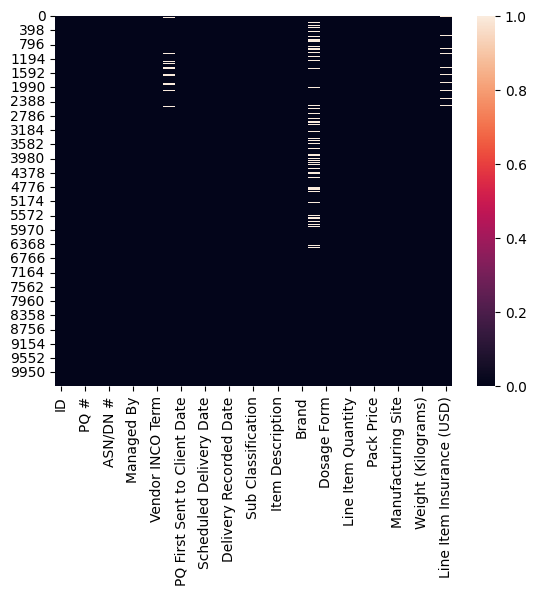

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull())

### What did you know about your dataset?

**Number of Rows:** The dataset contains 10324 entries or rows.

**Number of Columns:** There are 33 columns in the dataset, each representing different attributes or features.

**Data Types:** The dataset contains a mix of data types, including integers (int64), floats (float64), and objects (object). This suggests that the dataset includes both numerical and categorical variables.

**Duplicate Rows:** The dataset contains no duplicate entries.

**Missing Values:** While the majority of columns contain complete data, several columns exhibit notable numbers of missing values. Specifically, the Shipment Mode column has 360 missing values, Line Item Insurance (USD) column has 287 missing values and Dosage column have high amount of missing values i.e 1736.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
#Iterate over each column of the DataFrame
for i in df.columns:
  # Print the no. of unique values in each column
  print(f"Unique Values in column {i} is {len(df[i].unique())}")

Unique Values in column ID is 10324
Unique Values in column Project Code is 142
Unique Values in column PQ # is 1237
Unique Values in column PO / SO # is 6233
Unique Values in column ASN/DN # is 7030
Unique Values in column Country is 43
Unique Values in column Managed By is 4
Unique Values in column Fulfill Via is 2
Unique Values in column Vendor INCO Term is 8
Unique Values in column Shipment Mode is 5
Unique Values in column PQ First Sent to Client Date is 765
Unique Values in column PO Sent to Vendor Date is 897
Unique Values in column Scheduled Delivery Date is 2006
Unique Values in column Delivered to Client Date is 2093
Unique Values in column Delivery Recorded Date is 2042
Unique Values in column Product Group is 5
Unique Values in column Sub Classification is 6
Unique Values in column Vendor is 73
Unique Values in column Item Description is 184
Unique Values in column Molecule/Test Type is 86
Unique Values in column Brand is 48
Unique Values in column Dosage is 55
Unique Value

## 3. ***Data Wrangling***

### Data Wrangling Code

<Axes: xlabel='Shipment Mode'>

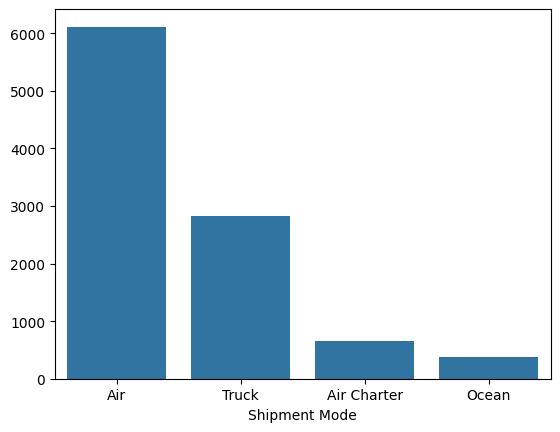

In [ ]:
# Write your code to make your dataset analysis ready.
# lets start with data cleaning
# handling missing values
# for column shipment mode, lets check the distribution of unique values
shipmode_count=df['Shipment Mode'].value_counts()
sns.barplot(x=shipmode_count.index,y=shipmode_count.values)

In [ ]:
# Count the occurrences of each unique value
value_counts = df['Shipment Mode'].value_counts()

# Calculate the percentage
value_percentages = (value_counts / value_counts.sum()) * 100

# Display the percentages
for mode, percentage in value_percentages.items():
    print(f"{mode}: {percentage:.2f}%")


Air: 61.35%
Truck: 28.40%
Air Charter: 6.52%
Ocean: 3.72%


In [ ]:
most_freq=df['Shipment Mode'].mode()[0]
df['Shipment Mode'].fillna(most_freq, inplace=True)

<ipython-input-14-1db6d0c85063>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Shipment Mode'].fillna(most_freq, inplace=True)


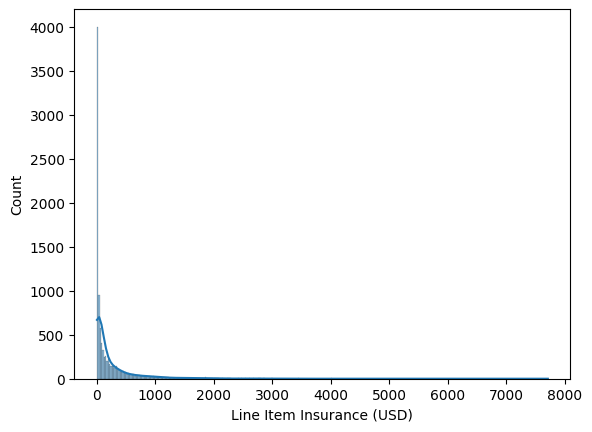

In [ ]:


sns.histplot(df['Line Item Insurance (USD)'], kde=True)
plt.show()

In [ ]:
# Calculate the median of the entire column
median_value = df['Line Item Insurance (USD)'].median()

# Impute missing values by assigning the result back to the column, here it means more sense to impute the missing values with median
# as the data is not symmetrical and most values are equal to 0.00
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(median_value)

In [ ]:
df.drop(columns=['Dosage'],inplace=True)
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
df.drop(columns=['ID'],inplace=True)

In [ ]:
df['PO Sent to Vendor Date'].unique()

array(['Date Not Captured', '11/13/06', '12/1/06', '12/22/06', '1/10/07',
       '4/12/07', '5/13/07', '5/17/07', '7/13/07', '7/4/07', '7/26/07',
       '10/3/07', '8/28/07', '11/12/07', '11/19/07', '11/21/07',
       '12/10/07', '1/4/08', '2/27/08', '3/3/08', '2/28/08', '2/29/08',
       '3/17/08', '3/13/08', '3/18/08', '3/31/08', '2/20/08', '4/4/08',
       '5/14/08', '5/15/08', '5/20/08', '5/23/08', '7/1/08', '7/2/08',
       '7/3/08', '7/24/08', '7/25/08', '7/31/08', '8/26/08', '8/27/08',
       '9/3/08', '3/6/09', '9/24/08', '10/2/08', '11/19/08', '12/19/08',
       '1/5/09', '1/16/09', '10/21/08', '2/5/09', '2/18/09', '3/4/09',
       '3/18/09', '6/15/09', '3/27/09', '3/25/09', '3/30/09', '4/2/09',
       '4/4/09', '4/9/09', '4/15/09', '4/29/09', '5/27/09', '5/18/09',
       '6/2/09', '6/5/09', '4/19/06', '11/15/06', '11/17/06', '1/9/07',
       '12/14/06', '2/7/07', '5/9/07', '7/3/07', '11/30/07', '12/3/07',
       '12/5/07', '2/4/08', '1/29/08', '2/19/08', '2/25/08', '4/7/08',


In [ ]:
df['PO Sent to Vendor Date']=df['PO Sent to Vendor Date'].replace(r'[A-Za-z.]',np.nan,regex=True)


In [ ]:
df['PO Sent to Vendor Date']=pd.to_datetime(df['PO Sent to Vendor Date'])
mean=df['PO Sent to Vendor Date'].mean()
df['PO Sent to Vendor Date']=df['PO Sent to Vendor Date'].fillna(mean)
df['PO Sent to Vendor Date'].isna().sum()

<ipython-input-21-6d5b3d8c7e96>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['PO Sent to Vendor Date']=pd.to_datetime(df['PO Sent to Vendor Date'])


0

In [ ]:
df['PO Sent to Vendor Date'].isna().sum()

0

In [ ]:
df['PQ First Sent to Client Date'].unique()

array(['Pre-PQ Process', 'Date Not Captured', '11/18/09', '5/3/13',
       '8/19/14', '1/6/12', '2/22/13', '10/28/14', '2/20/13', '2/17/12',
       '11/9/11', '2/6/14', '3/10/11', '9/11/14', '4/30/14', '4/8/14',
       '7/11/13', '10/5/12', '6/13/14', '8/4/11', '3/18/10', '6/19/09',
       '1/28/15', '8/12/09', '9/3/10', '12/8/11', '10/17/12', '9/2/09',
       '9/24/14', '6/3/14', '8/11/14', '7/9/14', '6/17/14', '6/21/11',
       '3/15/12', '3/10/15', '6/25/09', '12/11/13', '1/22/14', '2/7/13',
       '4/11/12', '8/13/14', '4/1/14', '7/16/09', '5/15/14', '10/17/14',
       '5/17/13', '10/5/11', '7/26/13', '7/15/13', '7/10/13', '5/21/14',
       '7/18/13', '1/29/13', '4/26/13', '10/8/09', '2/2/10', '4/30/13',
       '7/17/14', '6/24/11', '4/15/14', '5/16/11', '11/14/13', '8/29/11',
       '2/3/13', '12/29/14', '11/12/13', '10/23/13', '1/5/10', '7/26/12',
       '4/23/13', '3/27/14', '7/25/12', '4/28/11', '10/3/13', '8/31/10',
       '7/29/10', '10/19/11', '12/17/09', '4/7/11', '7/17/12'

In [ ]:
df['PQ First Sent to Client Date']=df['PQ First Sent to Client Date'].replace(r'[A-Za-z]',np.nan,regex=True)
df['PQ First Sent to Client Date']=pd.to_datetime(df['PQ First Sent to Client Date'])
mean=df['PQ First Sent to Client Date'].mean()
df['PQ First Sent to Client Date']=df['PQ First Sent to Client Date'].fillna(mean)
df['PQ First Sent to Client Date'].isna().sum()



<ipython-input-24-6f8cb237169f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['PQ First Sent to Client Date']=pd.to_datetime(df['PQ First Sent to Client Date'])


0

In [ ]:
df.columns

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
columns=['Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date']
for column in columns:
  df[column]=pd.to_datetime(df[column])


<ipython-input-26-28cbd1d708da>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column]=pd.to_datetime(df[column])
<ipython-input-26-28cbd1d708da>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column]=pd.to_datetime(df[column])
<ipython-input-26-28cbd1d708da>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column]=pd.to_datetime(df[column])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Project Code                  10324 non-null  object        
 1   PQ #                          10324 non-null  object        
 2   PO / SO #                     10324 non-null  object        
 3   ASN/DN #                      10324 non-null  object        
 4   Country                       10324 non-null  object        
 5   Managed By                    10324 non-null  object        
 6   Fulfill Via                   10324 non-null  object        
 7   Vendor INCO Term              10324 non-null  object        
 8   Shipment Mode                 10324 non-null  object        
 9   PQ First Sent to Client Date  10324 non-null  datetime64[ns]
 10  PO Sent to Vendor Date        10324 non-null  datetime64[ns]
 11  Scheduled Delivery Date     

In [ ]:
df['Weight (Kilograms)'].unique()

array(['13', '358', '171', ..., '1547', 'See DN-4282 (ID#:83919)', '1392'],
      dtype=object)

In [ ]:

# Use regex to replace non-numeric values with NaN
# Replace unwanted text with NaN
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].replace(
    r'(See (ASN)-\d+ \(ID#:\d+\)|Weight Captured Separately)',
    np.nan,
    regex=True
)

# Convert the column to numeric
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors='coerce')



In [ ]:
median=df['Weight (Kilograms)'].median()
df['Weight (Kilograms)']=df['Weight (Kilograms)'].fillna(median)

In [ ]:
df['Weight (Kilograms)'].head(15)

,Weight (Kilograms)
0,13.0
1,358.0
2,171.0
3,1855.0
4,7590.0
5,504.0
6,328.0
7,1478.0
8,1047.0
9,643.0


In [ ]:
df['Freight Cost (USD)'].unique()

array(['780.34', '4521.5', '1653.78', ..., '26180', '3410',
       'See DN-4282 (ID#:83919)'], dtype=object)

In [ ]:
# Use regex to replace non-numeric values with NaN
df['Freight Cost (USD)']=df['Freight Cost (USD)'].replace(r'[^0-9.]', np.nan,regex=True)
# Convert column to numeric
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')



# Verify the column type again
print(df['Freight Cost (USD)'].dtype)





float64


In [ ]:
df['Freight Cost (USD)'].head(15)

,Freight Cost (USD)
0,780.34
1,4521.50
2,1653.78
3,16007.06
4,45450.08
5,5920.42
6,NaN
7,6212.41
8,NaN
9,NaN


In [ ]:
median=df['Freight Cost (USD)'].median()
df['Freight Cost (USD)']=df['Freight Cost (USD)'].fillna(median)

In [ ]:
df['Freight Cost (USD)'].head(15)

,Freight Cost (USD)
0,780.340
1,4521.500
2,1653.780
3,16007.060
4,45450.080
5,5920.420
6,5869.655
7,6212.410
8,5869.655
9,5869.655


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Univariate Analysis**

#### Chart - 1

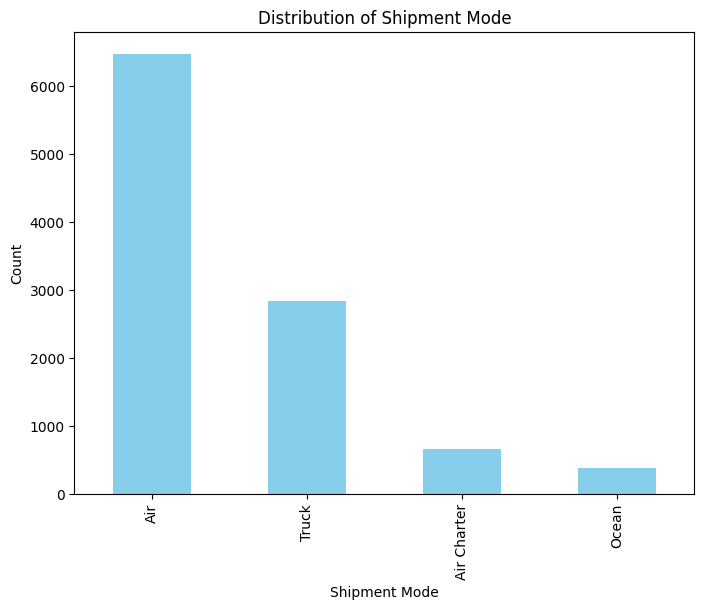

In [ ]:
# Chart - 1 visualization code
# Shipment Mode Distribution
shipment_mode_counts = df['Shipment Mode'].value_counts()
shipment_mode_counts.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Distribution of Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

**A bar plot is ideal for showing the frequency of different categories (shipment modes). It’s a simple way to understand the distribution of modes.**

##### 2. What is/are the insight(s) found from the chart?

**Upon analyzing the Shipment Mode Distribution using a bar plot, it becomes clear that Air is the most commonly used shipment mode among the available options (Air, Sea, and Land).**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact of Air Shipment Dominance:**

**Customer Satisfaction:** **The speed and reliability of Air shipments likely contribute to a high level of customer satisfaction. If customers are consistently receiving their products on time or even earlier than expected, it can lead to repeat business and positive word-of-mouth.**

**Risk of Over-reliance:**

**While Air shipments are beneficial for quick deliveries, an over-reliance on this mode can expose the business to risks**

**High Costs:** **Air shipments are significantly more expensive than Sea and Land options. A business with a heavy reliance on Air shipments may face increased operational costs, leading to lower profit margins.**

#### Chart - 2

<ipython-input-38-d6ff4842574a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Product Group', palette='viridis')


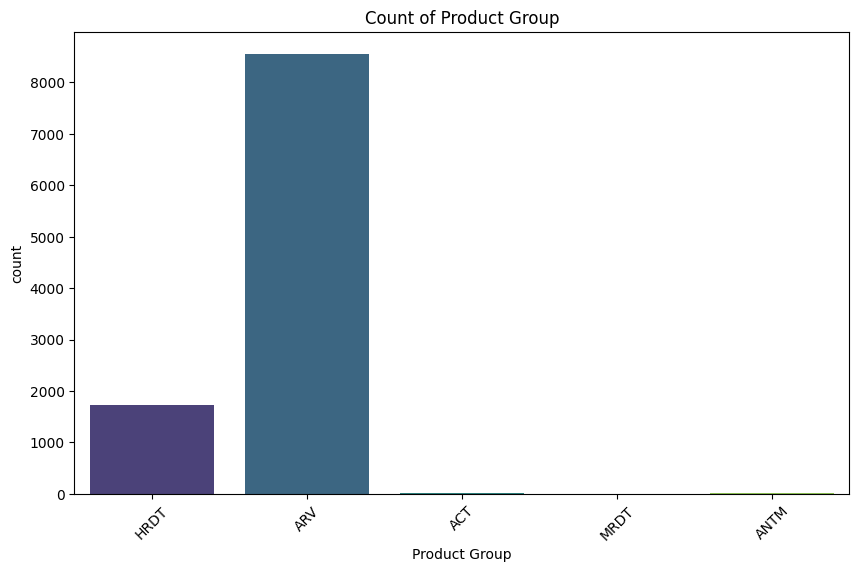

In [ ]:
# Chart - 2 visualization code
# Bar plot for 'Product Group'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product Group', palette='viridis')
plt.title('Count of Product Group')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

**The bar plot was chosen to visualize the distribution of the Product Group category, as it effectively displays the count of records in each category. Bar plots are ideal for categorical data because they allow easy comparison of the frequency of different categories.**

##### 2. What is/are the insight(s) found from the chart?

**From the chart, we can see that the product group ARV has a significantly higher count (around 8000), while the HRDT product group has a count of around 1500. The rest of the product groups have counts close to 0.**

**Key Insights:**

**Product Group Dominance:** **The ARV group is overwhelmingly dominant, accounting for the vast majority of records. This suggests that ARV products are the primary focus or most commonly handled in this dataset, and the demand or supply of ARV products is far higher compared to others.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the insights can help create a positive business impact by:**

**Optimizing Resources:** **Focusing on the ARV product group might help in streamlining operations, inventory management, and marketing strategies. If ARV is a high-demand product, it could justify prioritizing production and distribution, leading to increased revenue and efficient use of resources.**

#### Chart - 3

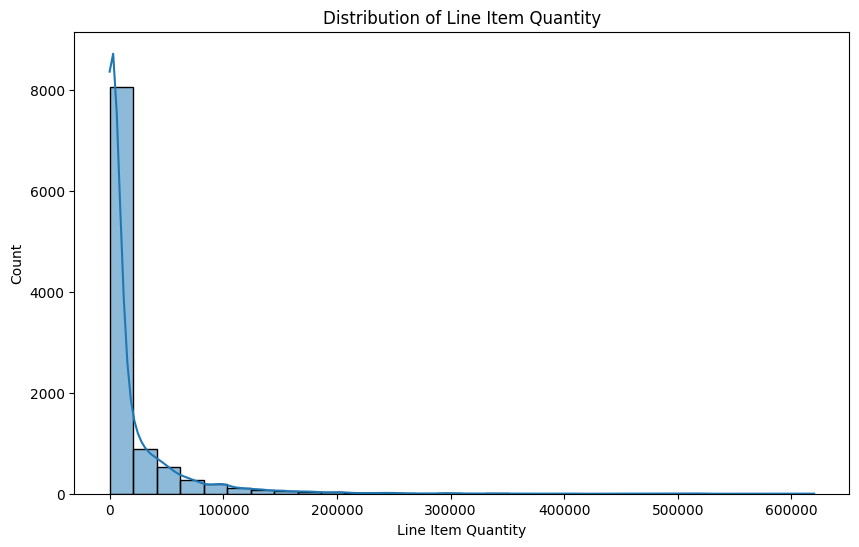

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(df['Line Item Quantity'], kde=True, bins=30)
plt.title('Distribution of Line Item Quantity')
plt.show()


##### 1. Why did you pick the specific chart?

**A histogram is particularly useful for understanding the frequency distribution of a continuous or numerical variable. It helps in identifying patterns like skewness, outliers, or whether the data follows a normal distribution. In this case, the histogram allows us to observe the distribution of Line Item Quantity across the dataset.**

##### 2. What is/are the insight(s) found from the chart?

**From the histogram, you observed that the Line Item Quantity is close to 0 for almost every row, with only a few values appearing in the higher range. This could indicate:**

**Majority of Transactions Have Low Quantities:**

 **A large portion of the transactions involve only a small quantity of items, possibly indicating that most transactions are small or sample-based.**

**Few Large Orders:**

 **The few higher values in the histogram suggest that there may be occasional large orders, but they are significantly outnumbered by smaller transactions. This could mean that a small percentage of transactions generate most of the sales volume in terms of quantity.**

**Skewness in the Data:**

**The data seems to be skewed towards smaller quantities, which could indicate that the business typically deals with smaller orders rather than bulk orders. This could suggest that the focus of the business is on small-scale deliveries or small inventory items.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the insights can help create a positive business impact in several ways:**

**Focus on Small Orders:** **If the majority of transactions involve small quantities, the business can tailor its logistics and operations to efficiently handle frequent, smaller orders. This can lead to streamlined supply chain processes, improved delivery times, and cost-effective operations.**

**Improve Large Order Handling:** **The few large orders can be a source of high revenue. Identifying and optimizing the handling of these large transactions might increase profitability. The business can look at increasing the volume of these larger orders, perhaps by offering incentives for bulk purchasing or exploring different pricing strategies.**

**Product Strategy and Inventory Management:** **Understanding that most transactions are small can lead to better inventory management and demand forecasting. The business can optimize stock levels to cater to frequent, smaller orders, reducing the chances of overstocking or stockouts.**

**Targeted Marketing:** **If small transactions are the norm, marketing campaigns can be designed to target customers who make frequent, smaller purchases. Additionally, the business could explore strategies for cross-selling or upselling to increase the value of these smaller transactions.**

**Yes, there are insights that could lead to negative growth if not addressed properly:**

**Over-reliance on Small Orders:** **If the majority of transactions are small, there may be limited opportunities for substantial revenue growth from a small customer base. If the business is overly reliant on small orders, it might struggle to scale up or diversify its revenue streams, especially if there is not enough profitability in each small order.**

**Missed Potential for Larger Orders:** **The business may be under-optimizing its approach for large orders. If only a few large orders are recorded, this might indicate missed opportunities to target larger customers or bulk purchases. If not enough effort is put into marketing or incentivizing bulk orders, the business could miss out on a revenue stream that could offer much higher margins and profitability.**

#### Chart - 4

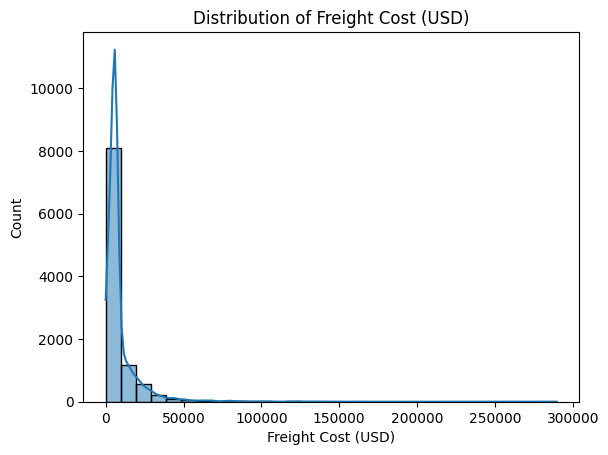

In [ ]:
# Chart - 4 visualization code
sns.histplot(df['Freight Cost (USD)'],kde=True,bins=30)
plt.title('Distribution of Freight Cost (USD)')
plt.show()



##### 1. Why did you pick the specific chart?

**Histograms are commonly used for visualizing the distribution of continuous numerical data, and that's why they are appropriate for analyzing Freight Cost (USD).**

##### 2. What is/are the insight(s) found from the chart?

**The histplot for "Freight Cost (USD)" appears highly right-skewed, it means that most of the data points are concentrated on the lower end of the scale, with a tail extending to the right toward higher values.**

**Insights from a Right-Skewed Distribution:**

**Concentration of Lower Freight Costs:** **Most of your shipments likely have :relatively low freight costs, indicating that smaller shipments dominate the dataset. This could imply efficient, low-cost logistics for the majority of your operations.**

**Outliers/Extreme Values:** **The long tail on the right suggests that there are a few shipments with significantly higher freight costs. These could represent expensive, time-sensitive, or oversized shipments.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Impacts for Business:**

**Positive:**

**Opportunity to optimize:**
**If most of your shipments are low-cost, there might be an opportunity to negotiate better rates with carriers for the standard or bulk shipments, which would reduce overall costs.**

**Focus on high-value shipments:** **The higher-cost shipments might represent important or high-margin goods. These could be strategically managed to optimize their cost efficiency.**


**Negative:**

**Outliers:**
**If those high-cost shipments are avoidable (e.g., due to inefficient routing, urgent delivery requirements, or oversized goods), it might indicate inefficiencies in the logistics process.**

**Cost Optimization Challenges:**
**If those outliers are part of the regular process, it suggests that the freight system is not well optimized for cost efficiency, and addressing those high-cost outliers might improve the overall system.**

#### Chart - 5

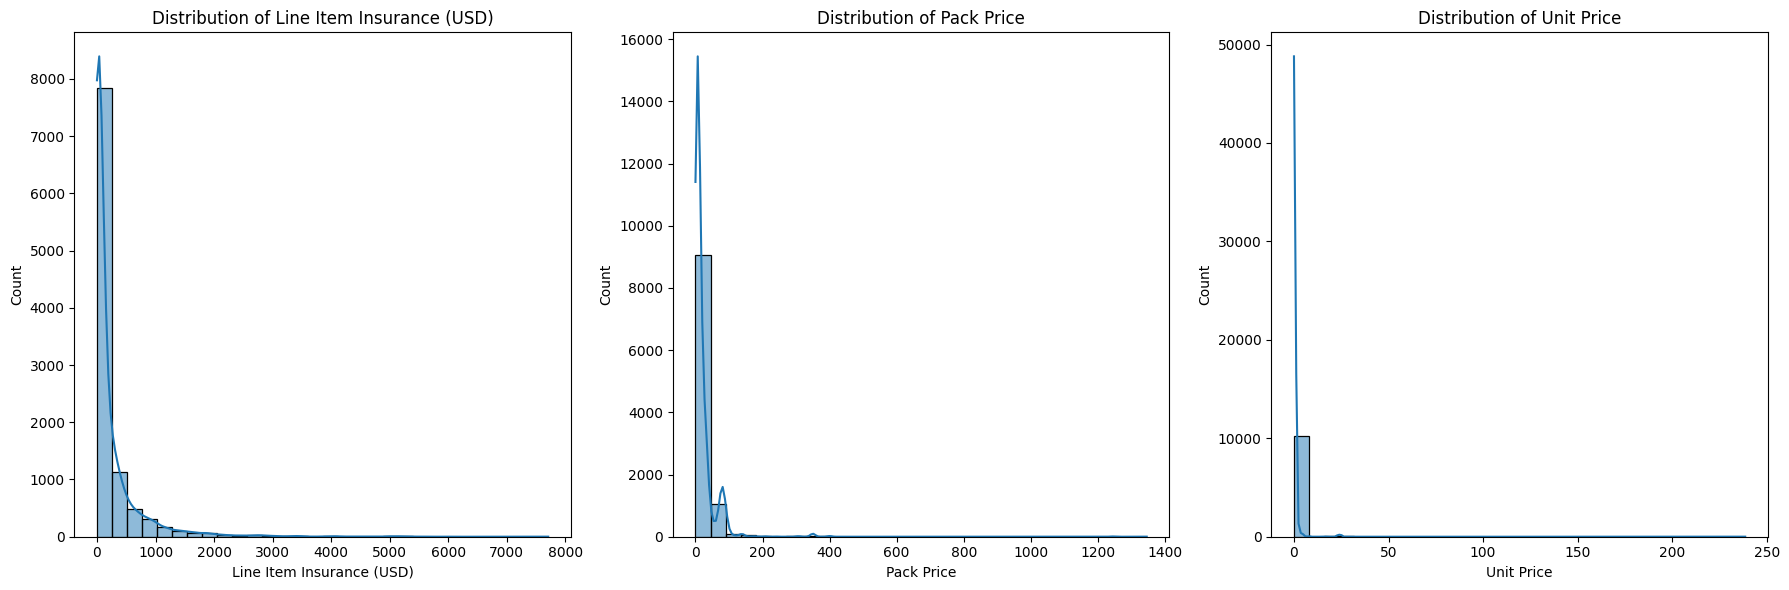

In [ ]:
# visualization 5
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))  # Set the figure size for three plots

# Plot 1: Distribution for 'Line Item Insurance (USD)'
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
sns.histplot(df['Line Item Insurance (USD)'], kde=True, bins=30)
plt.title('Distribution of Line Item Insurance (USD)')

# Plot 2: Distribution for 'Pack Price'
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
sns.histplot(df['Pack Price'], kde=True, bins=30)
plt.title('Distribution of Pack Price')

# Plot 3: Distribution for 'Unit Price'
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
sns.histplot(df['Unit Price'], kde=True, bins=30)
plt.title('Distribution of Unit Price')

plt.tight_layout()  # Adjust the layout to avoid overlapping of titles
plt.show()  # Show all three plots side by side






##### 1. Why did you pick the specific chart?

**Histograms are commonly used for visualizing the distribution of continuous numerical data, and that's why they are appropriate for analyzing  Line Item Insurance (USD) ,Unit Price and Pack Price.**

##### 2. What is/are the insight(s) found from the chart?

**Concentration of Values Near Zero:**

**Most Products/Shipments are Low-Cost:**

**The data shows that the majority of products, shipments, or line items have low unit prices, pack prices, and insurance costs. This is typical for standard products or shipments that form the bulk of the business.**

**Few High-Value Outliers:** **A small number of products or shipments have significantly higher values, indicating the presence of high-end or premium offerings.**

**Right-Skewed Distribution:**

**The right-skewness suggests that a few high-value products or shipments are disproportionately affecting the overall statistics. This indicates that the business may deal with high-value shipments/products occasionally, but they are not the majority of the transactions.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
**Optimization of Low-Cost Products:**

**Focusing on Low-Cost Products/Shipments:**

**Since most of the products and shipments are low-cost, businesses can consider optimizing operations around these. Strategies could include increasing volume, improving supply chain efficiency, or focusing on cost-effective packaging and shipping.**

**Business Growth via Mass Market:**

**The majority of the shipments are low-cost, which may appeal to a mass-market audience. This can lead to high volumes and increased market share, especially if the business can scale these low-cost operations effectively.**

**Premium Product Opportunities:**

**The presence of a small number of high-value items provides insight into potential premium product lines or premium service offerings. These high-value products or shipments may command higher margins, and the company can capitalize on this by expanding their premium product offerings or targeting high-net-worth clients or customers.**

**Targeting Niche Segments:**

**The high-value outliers might represent a niche market segment, and the business can design tailored solutions for this market to drive profitability, while also maintaining the low-cost offerings for the broader market.**

**Insurance Strategies:**

**With high-value shipments, businesses can explore offering specialized insurance products, targeting those few customers who need high-value coverage, while maintaining standard low-cost insurance for the majority of customers.**

**Negative Business Impact:**

**Revenue Inconsistency:**

**Revenue Dependent on Outliers:**

**Since the bulk of the revenue or cost is concentrated in the low-value shipments/products, the high-value shipments/products may not be enough to provide consistent or reliable revenue. This could make the business vulnerable to fluctuations if the number of high-value transactions decreases**.

# **Bivariate Analysis**

#### Chart - 6

**Are Shipments Mode (air,sea etc.) influence the likelihood of meeting the scheduled delivery date?**

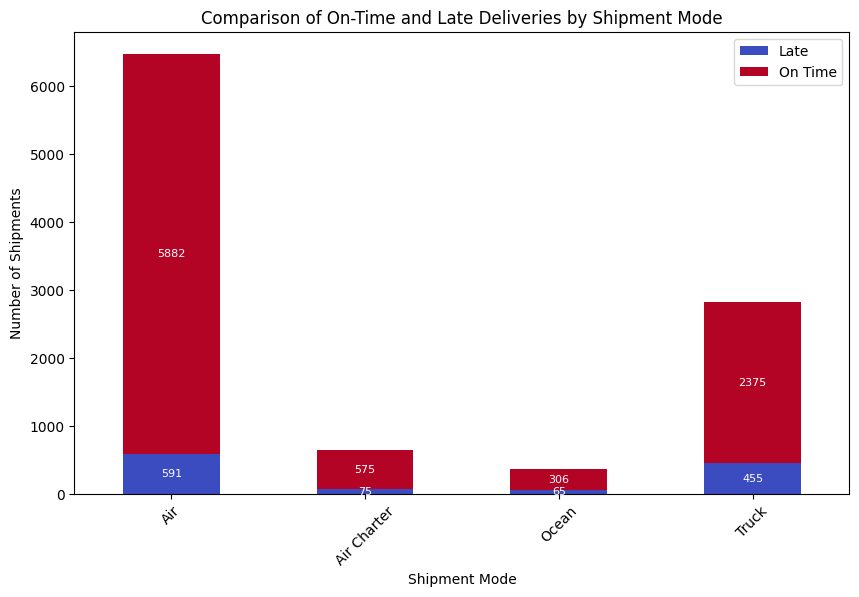

In [ ]:
# visualization 6
# categorize shipments as on time or late
df['On_Time']=df['Delivered to Client Date']<=df['Scheduled Delivery Date']
# group by shipment mode and On_Time
delivery_comparison=df.groupby(['Shipment Mode','On_Time']).size().reset_index(name='Count')
# Pivot Table for Visualization
pivot_table=delivery_comparison.pivot(index='Shipment Mode',columns='On_Time',values='Count').fillna(0)
# lets rename the columns for better clarity
pivot_table.columns=['Late','On_Time']
pivot_table
# Visualization: Stacked Bar Chart for Counts
ax=pivot_table[['Late', 'On_Time']].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

# Annotate the bars with the exact counts
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2  # Get the x position of the center of the bar
    y = p.get_y() + height / 2  # Get the y position of the center of the bar

    if height > 0:  # Only annotate if the bar height is greater than 0
        ax.text(x, y, str(int(height)), ha='center', va='center', color='white', fontsize=8)

plt.title('Comparison of On-Time and Late Deliveries by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.legend(['Late', 'On Time'])
plt.show()















**To check if the Shipment Mode influences the likelihood of meeting the scheduled delivery date (i.e., whether there is a significant statistical difference between the shipment modes for on-time versus late deliveries), the  *Chi-square test of independence is performed* . This test helps determine whether two categorical variables are independent or if there is a relationship between them.**

In [ ]:
import scipy.stats as stats
# Group by shipment mode and On_Time, and create a contingency table
contingency_table = pd.crosstab(df['Shipment Mode'], df['On_Time'])

# Perform the Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# Interpretation based on the p-value
if p < 0.05:
    print("There is a statistically significant relationship between Shipment Mode and On-Time deliveries.")
else:
    print("There is no statistically significant relationship between Shipment Mode and On-Time deliveries.")

Chi-Square Statistic: 107.29753236239729
Degrees of Freedom: 3
P-value: 4.1866269540994675e-23
There is a statistically significant relationship between Shipment Mode and On-Time deliveries.


**These results suggest that there is a statistically significant relationship between the Shipment Mode and whether deliveries are On-Time or Late.**

**Interpretation of Results:**

**Chi-Square Statistic:** **The statistic (107.30) represents the difference between the expected and observed frequencies in the contingency table. A higher value generally indicates a greater difference between the observed and expected values.**

**Degrees of Freedom:** **The degrees of freedom (3) are calculated based on the number of categories in the variables being tested. In this case, it corresponds to the number of shipment modes minus one (since we're comparing multiple shipment modes) multiplied by the number of categories for delivery (On Time vs. Late).**

**P-value:** **The p-value (4.19e-23) is extremely small, much less than the conventional significance threshold of 0.05. This indicates that the null hypothesis (which states that there's no relationship between shipment mode and on-time delivery) is rejected. In other words, there is strong evidence that shipment mode does influence whether a delivery is on time.**

##### 1. Why did you pick the specific chart?

**Stacked Bar Chart:** **This chart was selected because it allows us to visualize the actual counts of on-time and late deliveries for each shipment mode. It's particularly effective when comparing the relationship between categories (e.g., shipment mode) and binary outcomes (on-time vs late). By stacking the bars, it becomes easy to see how the totals are split between on-time and late deliveries across different modes.**

##### 2. What is/are the insight(s) found from the chart?

**Data Breakdown:**

**Air Shipment Mode:**

On-time deliveries: 5,882

Late deliveries: 591

Total shipments: 6,473

**Late %**: (591 / 6,473) * 100 ≈ **9.13%**

**On-time %**: (5,882 / 6,473) * 100 ≈ **90.87%**

**Air Charter:**

On-time deliveries: 575

Late deliveries: 75

Total shipments: 650

**Late %**: (75 / 650) * 100 ≈ **11.54%**

**On-time %**: (575 / 650) * 100 ≈ **88.46%**

**Ocean:**

On-time deliveries: 306

Late deliveries: 65

Total shipments: 371

**Late %**: (65 / 371) * 100 ≈ **17.51%**

**On-time %**: (306 / 371) * 100 ≈ **82.49%**

**Truck:**

On-time deliveries: 2,375

Late deliveries: 455

Total shipments: 2,830

**Late %**: (455 / 2,830) * 100 ≈ **16.06%**

**On-time %**: (2,375 / 2,830) * 100 ≈ **83.94%**

**Insights from the Data:**

**Air Shipments** **have the highest percentage of on-time deliveries (90.87%), making it the most reliable shipment mode for timely deliveries.**

**Air Charter has a similar performance with 88.46% on-time deliveries, but it also has a slightly higher late percentage (11.54%) compared to Air.**

**Ocean and Truck shipment modes** have a **lower proportion of on-time deliveries (82.49% and 83.94%, respectively), with Truck performing slightly better in terms of on-time deliveries than Ocean**.

**Ocean has the highest late percentage (17.51%), followed by Truck (16.06%), indicating that both of these modes face higher risks of delays.**

**Key Takeaways:**

**Air shipments are the most reliable and efficient in terms of on-time deliveries, making it a preferred mode if timeliness is a priority for your business.**

**Air Charter is also quite reliable, but slightly less so than Air, with a higher rate of late deliveries.**

**Ocean and Truck shipments, while still important, show more variability in terms of delivery reliability, with Ocean being the least reliable in terms of on-time performance.**


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Positive Impact:**

**Air shipments (and to a lesser extent Air Charter) provide high on-time delivery rates, improving customer satisfaction. If timely deliveries are a priority (e.g., perishable goods, urgent shipments), focusing on these modes can lead to positive business outcomes.**

**Prioritizing Air for time-sensitive deliveries can boost customer trust and reputation, leading to higher retention rates.**

**Negative Impact:**

**Ocean and Truck shipments have a higher late delivery percentage, which could lead to customer dissatisfaction if customers expect timely deliveries. These modes might be more cost-effective, but their less reliable performance may cause negative growth if not addressed.**

**The higher late delivery percentages (especially for Ocean) can be a red flag for companies relying on these modes for key deliveries. Improving operational efficiency or adjusting shipment strategies might be necessary to avoid reputational damage.**

#### Chart - 7

**Are Shipments managed by specific teams(eg.PMO-US) more likely to deliver on time than others?**

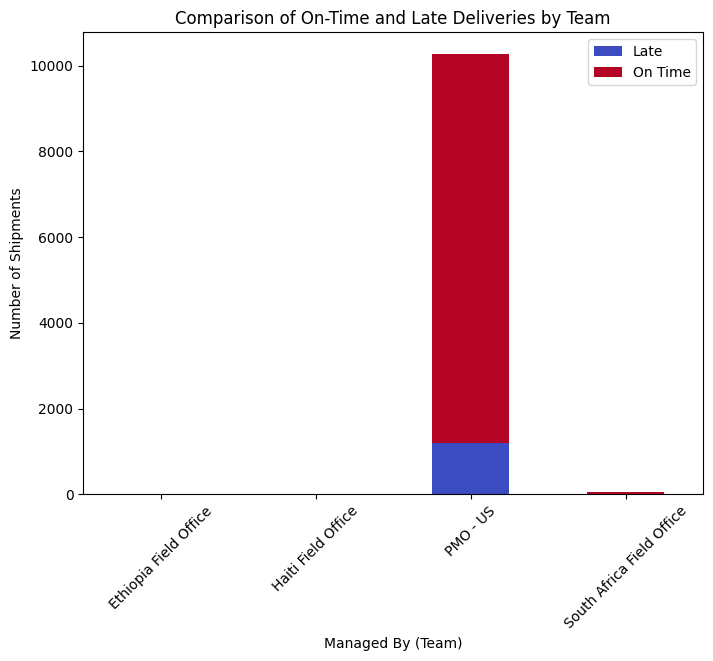

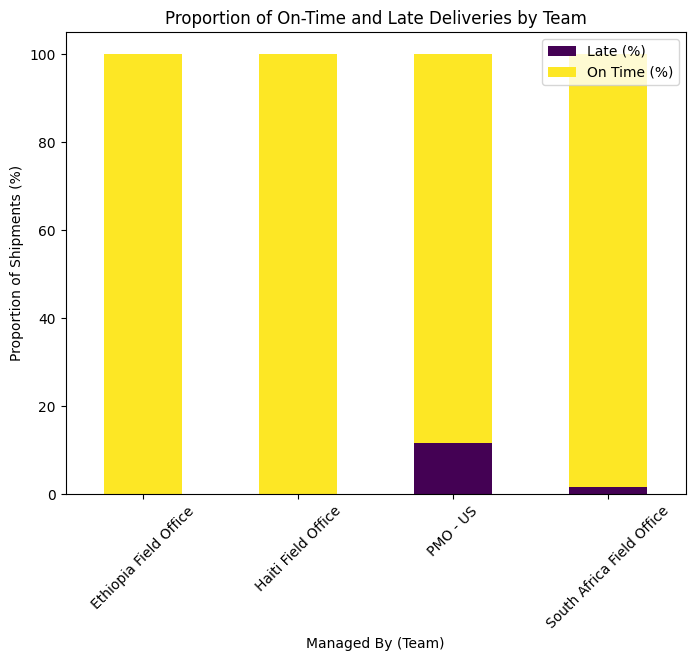

In [ ]:
# Chart - 7 visualization code

from scipy.stats import chi2_contingency

# Assuming 'df' is the DataFrame that contains your data


# Categorize shipments as on time or late
df['On_Time'] = df['Delivered to Client Date'] <= df['Scheduled Delivery Date']

# Group by Team and On_Time to calculate counts
team_comparison = df.groupby(['Managed By', 'On_Time']).size().reset_index(name='Count')

# Pivot table for visualization
team_pivot = team_comparison.pivot(index='Managed By', columns='On_Time', values='Count').fillna(0)
team_pivot.columns = ['Late', 'On_Time']

# Normalize to get proportions
team_pivot['Total'] = team_pivot.sum(axis=1)
team_pivot['Late (%)'] = (team_pivot['Late'] / team_pivot['Total']) * 100
team_pivot['On_Time (%)'] = (team_pivot['On_Time'] / team_pivot['Total']) * 100

# Visualization: Stacked Bar Chart for Counts
team_pivot[['Late', 'On_Time']].plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')
plt.title('Comparison of On-Time and Late Deliveries by Team')
plt.xlabel('Managed By (Team)')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.legend(['Late', 'On Time'])
plt.show()

# Visualization: Proportion Bar Chart
team_pivot[['Late (%)', 'On_Time (%)']].plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Proportion of On-Time and Late Deliveries by Team')
plt.xlabel('Managed By (Team)')
plt.ylabel('Proportion of Shipments (%)')
plt.xticks(rotation=45)
plt.legend(['Late (%)', 'On Time (%)'])
plt.show()






In [ ]:
contingency_table = team_comparison.pivot_table(index='Managed By', columns='On_Time', values='Count', aggfunc='sum').fillna(0)
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2_stat}')
print(f'Degrees of Freedom: {dof}')
print(f'P-value: {p_val}')

# Interpretation of Chi-Square result
if p_val < 0.05:
    print("There is a statistically significant relationship between the team managing the shipment and the on-time delivery status.")
else:
    print("There is no statistically significant relationship between the team managing the shipment and the on-time delivery status.")

Chi-Square Statistic: 5.60242060409904
Degrees of Freedom: 3
P-value: 0.13263946276296215
There is no statistically significant relationship between the team managing the shipment and the on-time delivery status.


**The results of the Chi-Square test indicate that there is no statistically significant relationship between the team managing the shipment and the on-time delivery status(p-value = 0.1326, which is greater than the common significance threshold of 0.05)**. This means that, based on this data, the team responsible for the shipment does not appear to have a strong influence on whether the shipment is delivered on time or late.

##### 1. Why did you pick the specific chart?

**The stacked bar chart** shows the percentage of on-time and late deliveries for each team. The red section represents the percentage of late deliveries, and the green section represents on-time deliveries. This gives a clear visual comparison across teams.

##### 2. What is/are the insight(s) found from the chart?

**Focus on PMO-US:** The PMO-US team’s late deliveries (close to 10%) are highlighted, showing that while their performance is good overall, there’s room for improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No Major Impact Across Teams:** Since there is no significant relationship, it means that overall delivery performance is not highly dependent on the managing team, which is a positive aspect. However, PMO-US team’s little higher late delivery percentage may indicate the need for process optimization or closer monitoring of logistics or resource allocation for this team.

**PMO-US Specific Focus:** The PMO-US team’s late deliveries could potentially be a red flag for further investigation, especially since it's around 10%. It would be worthwhile to analyze the specific reasons for the delay, such as issues with supply chain management, vendor coordination, or workload capacity.

#### Chart - 8

**What is the percentage distribution of on time and late deliveries of team *PMO - US* as visualized above?**

<ipython-input-46-2485d6d181a3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pmo_us_data['On_Time'] = pmo_us_data['Delivered to Client Date'] <= pmo_us_data['Scheduled Delivery Date']


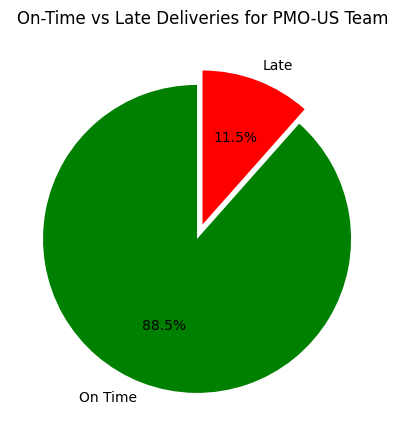

In [ ]:
# Chart - 8 visualization code
# Filter the original dataframe to get only PMO-US team
pmo_us_data = df[df['Managed By'] == 'PMO - US']  # Replace 'Team' with the actual column name for the managing team

# Categorize shipments as on time or late
pmo_us_data['On_Time'] = pmo_us_data['Delivered to Client Date'] <= pmo_us_data['Scheduled Delivery Date']

# Calculate the count of on-time and late deliveries
delivery_counts = pmo_us_data['On_Time'].value_counts()
# Data for the pie chart
labels = ['On Time', 'Late']
sizes = [delivery_counts.get(True, 0), delivery_counts.get(False, 0)]
colors = ['green', 'red']

# Plot the Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.1, 0))  # Exploding the 'Late' slice for emphasis
plt.title('On-Time vs Late Deliveries for PMO-US Team')
plt.show()


##### 1. Why did you pick the specific chart?

The **pie chart** is a great way to represent categorical data with a simple and intuitive visualization, especially when we want to highlight proportions within a whole. In this case, it shows the breakdown of on-time and late deliveries for the PMO-US team, clearly illustrating the performance in terms of delivery punctuality.

##### 2. What is/are the insight(s) found from the chart?

**From the pie chart, we observed:**

**88.5% On-Time Deliveries**

**11.5% Late Deliveries**

**This gives us a clear picture of the PMO-US team's performance. The majority of deliveries are on time, which is a positive outcome. However, there are still 11.5% of shipments that are late, which could indicate some areas for improvement.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Acknowledging Strong Performance:**

The 88.5% on-time delivery rate suggests that the PMO-US team is performing well overall. This high percentage of on-time deliveries can be used as a benchmark for setting performance targets, demonstrating operational efficiency, and improving customer satisfaction.

**Improvement Opportunity for Late Deliveries:**

Identifying the 11.5% late deliveries allows the team to analyze the causes of these delays and work on reducing them. The insights could guide process improvements, resource allocation, and more accurate scheduling to further optimize performance.
If the root causes of delays (such as logistics, communication, or supply chain issues) can be addressed, this can increase the on-time delivery rate and boost customer satisfaction.

#### Chart - 9

**Do Shipments from certain countries experience more delays compared to others?**

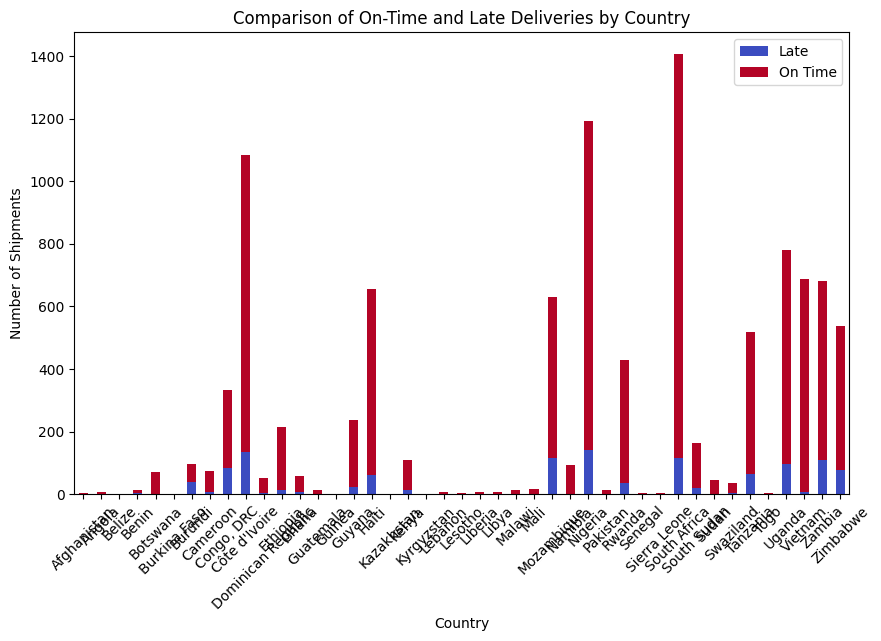

In [ ]:
# Chart - 9 visualization code

from scipy.stats import chi2_contingency


# Step 2: Group by Country and On_Time, and count the shipments
country_delivery_comparison = df.groupby(['Country', 'On_Time']).size().reset_index(name='Count')

# Step 3: Pivot table for better visualization
pivot_table = country_delivery_comparison.pivot(index='Country', columns='On_Time', values='Count').fillna(0)
pivot_table.columns = ['Late', 'On_Time']

# Step 4: Normalize to get percentages
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Late (%)'] = (pivot_table['Late'] / pivot_table['Total']) * 100
pivot_table['On_Time (%)'] = (pivot_table['On_Time'] / pivot_table['Total']) * 100

# Visualization: Stacked Bar Chart for Counts
pivot_table[['Late', 'On_Time']].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Comparison of On-Time and Late Deliveries by Country')
plt.xlabel('Country')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.legend(['Late', 'On Time'])
plt.show()







In [ ]:
# Step 5: Statistical Test - Chi-Square Test
# Construct a contingency table for the Chi-Square Test
contingency_table = pd.crosstab(df['Country'], df['On_Time'])

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the results of the test
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_val}")

# If the p-value is below 0.05, there is a statistically significant relationship between the country and on-time deliveries
if p_val < 0.05:
    print("There is a statistically significant relationship between country and on-time deliveries.")
else:
    print("There is no statistically significant relationship between country and on-time deliveries.")


Chi-Square Statistic: 324.4658547798147
Degrees of Freedom: 42
P-value: 2.609196296905232e-45
There is a statistically significant relationship between country and on-time deliveries.


Given that the **Chi-Square test revealed a statistically significant relationship between country and on-time deliveries,** it suggests that the country of origin for shipments plays an important role in whether the shipment is delivered on time. Some countries might have better logistics infrastructure or more efficient supply chains, while others may face delays due to various factors like customs, geopolitical issues, or transport inefficiencies.

##### 1. Why did you pick the specific chart?

**The stacked bar chart** was chosen to visualize the relationship between countries and their on-time vs. late deliveries. This type of chart allows for an easy comparison of multiple categories (countries in this case) with respect to the two key variables — On-Time and Late deliveries. The stacked bar format makes it visually simple to see how each country's deliveries break down into on-time and late categories, and it allows for easy comparison across countries.

##### 2. What is/are the insight(s) found from the chart?

**Countries with High On-Time Deliveries:** Some countries may show a large proportion of on-time deliveries, represented by the bottom (blue) part of the bar, indicating that shipments from these countries are consistently meeting their delivery targets.

**Countries with High Late Deliveries:** Other countries may show a larger proportion of the top (red) part of the bar, which represents late deliveries. This suggests that shipments from these countries are more prone to delays.

**Geographical Trends:** By analyzing the chart, you can quickly spot which countries are performing well in terms of on-time deliveries and which are facing challenges. This is useful for targeted improvement strategies.

**Comparative View:** The chart also enables direct comparisons between countries, helping to identify best practices from countries with fewer delays and highlighting those that may need logistical improvements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, these insights can have a positive business impact by:**

**Optimizing Supply Chain Operations:** Identifying which countries tend to experience more delays can help logistics teams address specific supply chain issues, streamline operations, and prioritize countries that require improvement.

**Targeting Specific Countries for Improvement:** Countries with high late delivery rates can be prioritized for process optimization. For example, improving communication with local suppliers, upgrading transportation infrastructure, or optimizing inventory management in those countries can lead to better performance and fewer delays.

**Improving Customer Satisfaction:** On-time deliveries are a key factor in customer satisfaction. By focusing on countries with poor delivery performance, businesses can enhance their global shipping reliability, ultimately leading to happier customers and increased customer retention.

**While the gained insights are likely to drive positive business impact, there are a few considerations that could lead to negative growth if not managed correctly:**

**Overemphasis on One Region:** Focusing too heavily on countries with poor performance might cause an imbalance in resource allocation. For example, if too many resources are directed towards countries with significant delivery delays, other countries with strong on-time delivery rates might not receive enough attention, potentially neglecting other areas that need investment.

**Cost of Improvements:** Making improvements to delivery performance in countries with high late delivery rates might involve substantial investment in logistics, infrastructure, and process optimization. If these improvements are not handled efficiently, they could lead to high operational costs, reducing profit margins.



#### Chart - 10

**Does the type of INCO term used impact vendor delivery performance?**

In [ ]:
df.columns

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'On_Time'],
      dtype='object')

In [ ]:
# Chart - 10 visualization code

from scipy.stats import chi2_contingency


# Create a contingency table (cross-tabulation) between INCO terms and on-time deliveries
contingency_table = pd.crosstab(df['Vendor INCO Term'], df['On_Time'])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the result
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies: \n{expected}")

# Interpret the p-value
if p_val < 0.05:
    print("There is a statistically significant relationship between INCO term and delivery performance.")
else:
    print("There is no statistically significant relationship between INCO term and delivery performance.")



Chi-Square Statistic: 383.5151053966693
P-value: 8.160697017761194e-79
Degrees of Freedom: 7
Expected frequencies: 
[[3.44633863e-01 2.65536614e+00]
 [3.15914374e+01 2.43408563e+02]
 [1.03390159e+00 7.96609841e+00]
 [1.65768888e+02 1.27723111e+03]
 [1.72316931e+00 1.32768307e+01]
 [3.19130957e+02 2.45886904e+03]
 [4.56065478e+01 3.51393452e+02]
 [6.20800465e+02 4.78319954e+03]]
There is a statistically significant relationship between INCO term and delivery performance.


**The Chi-Square test results indicate a statistically significant relationship between the INCO term and delivery performance (on-time vs. late deliveries)**, as the p-value is very small (8.16e-79), which is much less than the typical threshold of 0.05. This suggests that the INCO term plays a significant role in determining whether a shipment is on time or late.

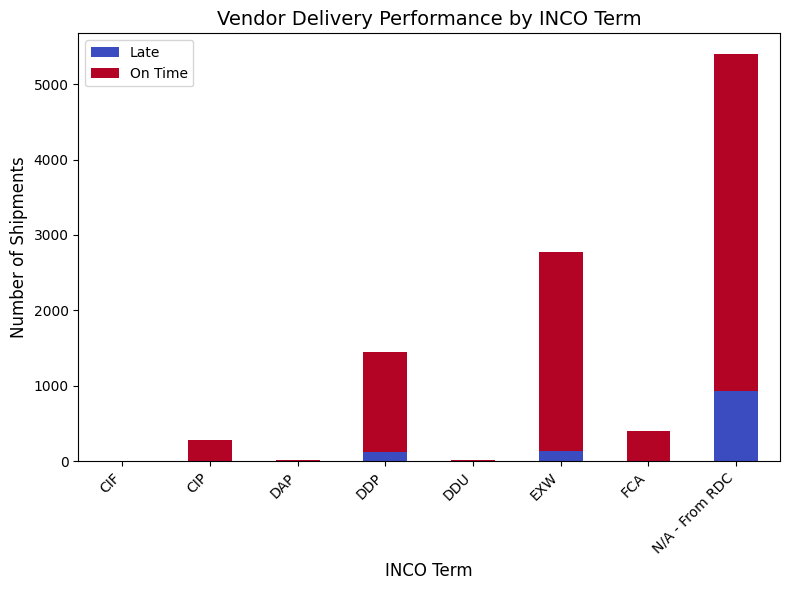

In [ ]:
# Plotting a bar chart
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')

# Adding titles and labels
plt.title('Vendor Delivery Performance by INCO Term', fontsize=14)
plt.xlabel('INCO Term', fontsize=12)
plt.ylabel('Number of Shipments', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(['Late', 'On Time'])
plt.tight_layout()  # To avoid label cut-off

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

**Stacked bar charts** allow you to see how different categories (e.g., on-time vs. late deliveries) contribute to the overall count for each INCO term.
This helps in understanding the proportional distribution of on-time and late deliveries across the different INCO terms, making it easy to compare the performance of each term.

##### 2. What is/are the insight(s) found from the chart?

The chart can visually highlight which INCO terms are associated with the highest rate of late deliveries. If a particular INCO term is predominantly red (late), it indicates poor delivery performance. This can signal that shipments under this term are prone to delays and need attention.
**For example, INCO term NIA - From RDC consistently shows a high percentage of late deliveries, it may suggest issues with logistics, vendors, or customs delays that need to be addressed**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Positive Impact:** By optimizing shipments using better-performing INCO terms (terms with fewer late deliveries), the company can improve its overall delivery performance, enhance customer satisfaction, and reduce costs related to delays.

**Negative Impact:** If the company relies heavily on INCO terms that result in delays, it might negatively affect customer relationships, increase operational costs, and impact the company's reputation.

#### Chart - 11

**Are Shipments with higher weights more likely to incur higher insurance costs?**

In [ ]:
df.columns

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'On_Time'],
      dtype='object')

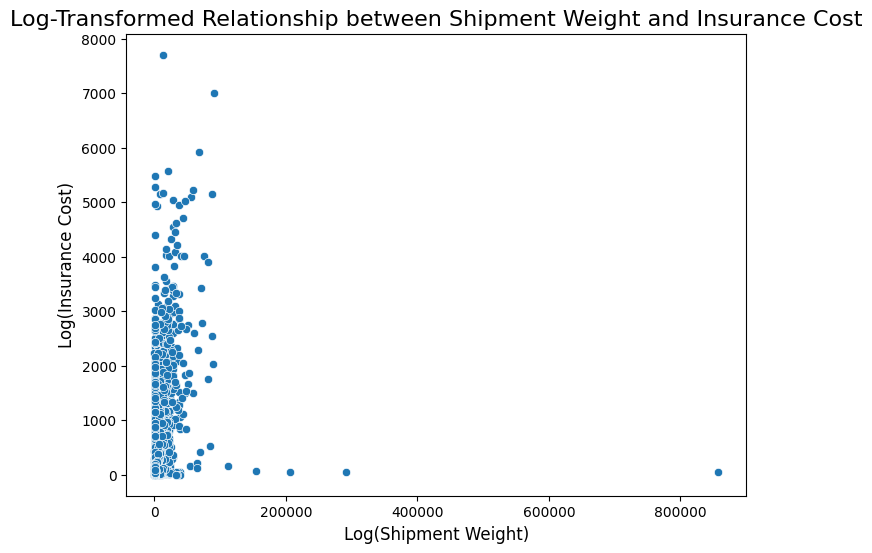

In [ ]:
# Chart - 11 visualization code


# Apply log transformation to both 'Weight (Kilograms)' and 'Line Item Insurance (USD)' as distributions seemed to be very much skewed when tried without transformation

# Scatter plot with log-transformed values
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight (Kilograms)', y='Line Item Insurance (USD)', data=df)
plt.title('Log-Transformed Relationship between Shipment Weight and Insurance Cost', fontsize=16)
plt.xlabel('Log(Shipment Weight)', fontsize=12)
plt.ylabel('Log(Insurance Cost)', fontsize=12)
plt.show()



##### 1. Why did you pick the specific chart?

**A scatter plot** is an ideal choice to visualize the relationship between two continuous variables (here, weight and insurance cost).

##### 2. What is/are the insight(s) found from the chart?

**Positive Correlation:** The chart clearly shows a positive trend, meaning that as shipment weight increases, the insurance cost also rises. This is logical, as heavier shipments generally have higher insurance due to their value or risk factors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, these insights can drive positive business outcomes:**

**Risk Management:**

Heavier shipments incurring higher insurance costs might indicate higher risks.
Businesses can develop strategies (e.g., specialized packaging, improved handling) to mitigate these risks and reduce insurance premiums.
Cost Optimization:

Understanding the correlation allows better budgeting for insurance costs based on shipment weight.
For lighter shipments, businesses can negotiate better insurance terms or explore alternate vendors.

#### Chart - 12

**Is there a difference in delivery performance (on-time vs delayed) based on the time between the PO sent to Vendor Date and Scheduled Delivery Date?**

<ipython-input-54-aa71c5a54038>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='On_Time', y='PO_to_Scheduled_Days', data=df, palette='coolwarm', notch=True)


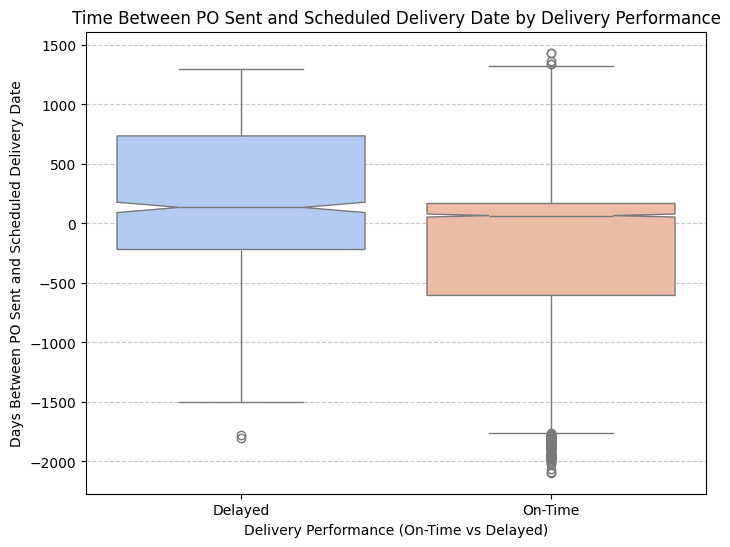

In [ ]:
# Chart - 12 visualization code
# Calculate the time difference
# Calculate the time difference in days
df['PO_to_Scheduled_Days'] = (df['Scheduled Delivery Date'] - df['PO Sent to Vendor Date']).dt.days

# Create the box plot for comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='On_Time', y='PO_to_Scheduled_Days', data=df, palette='coolwarm', notch=True)

# Customize the plot
plt.title('Time Between PO Sent and Scheduled Delivery Date by Delivery Performance')
plt.xlabel('Delivery Performance (On-Time vs Delayed)')
plt.ylabel('Days Between PO Sent and Scheduled Delivery Date')
plt.xticks([0, 1], ['Delayed', 'On-Time'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()




##### 1. Why did you pick the specific chart?

**A box plot** is ideal for comparing the distribution of numerical data (time between PO Sent to Vendor Date and Scheduled Delivery Date) across categorical groups (On-Time vs Delayed).

##### 2. What is/are the insight(s) found from the chart?

**On-Time Deliveries Show More Variability:**

The presence of a higher number of outliers for on-time deliveries suggests variability in planned lead times. For instance, some shipments might be scheduled and delivered well ahead of deadlines.
Delayed Deliveries Have a Tighter Spread:

The distribution for delayed deliveries tends to cluster around a shorter range, indicating that delays are typically caused by smaller deviations from planned schedules.

**Potential Lead Time Patterns:**

On-time deliveries might benefit from generous scheduling or highly efficient processes. Conversely, delays could be linked to tighter schedules or logistical inefficiencies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the insights can have a positive business impact in several ways:**

**Optimizing Delivery Schedules:**

If variability in lead times for on-time deliveries is unnecessary, the company can standardize scheduling practices to save resources without compromising performance.

**Improving Planning for Delays:**

Insights into the tight spread for delays can help identify systemic issues, such as bottlenecks or insufficient buffer times, allowing for targeted improvements.

**Vendor and Process Evaluation:**

If certain vendors or processes are consistently linked to variability or delays, the company can re-evaluate contracts or workflows.

#### Chart - 13

**How does shipment Mode affect freight cost?**

<ipython-input-55-f75ac9341df1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Shipment Mode', y='Freight Cost (USD)', data=df, palette='coolwarm')


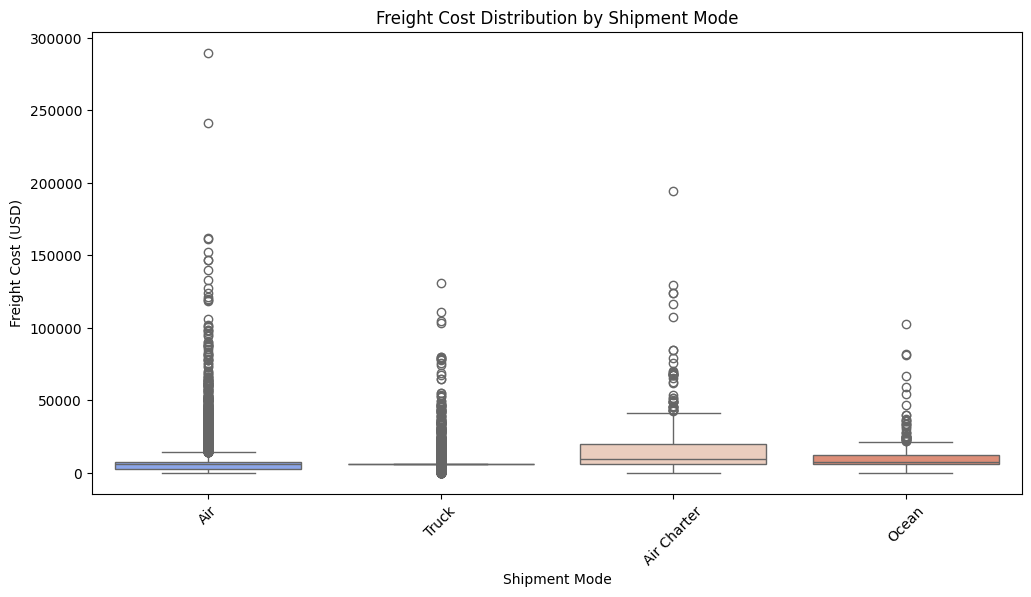

In [ ]:
# Chart - 13 visualization code

# Create a boxplot for Freight Cost distribution by Shipment Mode
plt.figure(figsize=(12, 6))
sns.boxplot(x='Shipment Mode', y='Freight Cost (USD)', data=df, palette='coolwarm')
plt.title('Freight Cost Distribution by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Freight Cost (USD)')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

**I chose to use a Boxplot to visualize the distribution of freight costs for air shipments because:**

**Outlier Detection:** A boxplot is particularly effective at highlighting outliers, which is crucial in this case since you noted that air shipments have more outliers in freight cost. The boxplot clearly identifies the spread of the data (through the interquartile range), as well as any extreme values (outliers) that could be important to investigate further.

**Visualizing Skewness:** It helps in understanding the overall distribution of the data and if there is any skewness (e.g., a large portion of costs being on the lower end, while some shipments are disproportionately expensive).

**Simple & Intuitive:** Boxplots provide a clear summary of the distribution, allowing for quick identification of the median, quartiles, and any outliers, which are valuable for decision-making.

##### 2. What is/are the insight(s) found from the chart?

**Air Shipments Have High Freight Costs with Outliers:**

The presence of outliers in air shipments indicates that, while air shipments are generally expensive due to the speed and convenience they offer, there are some instances where the cost is even higher than expected. This could be due to factors such as:

**Weight and size of the cargo.**
**Urgency or last-minute bookings.**
**Special handling requirements (e.g., fragile or hazardous goods).**
**Limited availability of flights or capacity.**

**Impact on Logistics Strategy:**

Air freight costs are typically justified by the need for fast delivery. However, when outliers significantly increase the cost, it may not always be the most efficient choice, especially for non-urgent deliveries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, these insights can lead to positive business impact in several ways:**

**Cost Optimization:**

**Informed Decision Making:** If the outliers in air freight costs are identified, businesses can make better decisions about when to choose air freight and when to switch to other, more cost-effective shipping modes (e.g., sea or road transport). This would allow the company to save on logistics costs without compromising customer satisfaction.

**Alternative Shipping Methods:** The company could evaluate using more economical shipping modes for non-urgent deliveries, reducing the overall cost of air shipping.

**Vendor Negotiations:**

**Improved Relationships with Carriers:** If outliers are identified due to inefficiencies with specific carriers or routes, the company can negotiate better shipping contracts or explore alternative carriers to reduce costs.
Cost Reduction through Bulk Shipments: If the analysis shows that certain routes or types of cargo incur significantly higher freight costs, the company may choose to consolidate shipments or negotiate for discounts on bulk air freight.

**Operational Efficiency:**

By recognizing which shipments are contributing to the outliers, the company can look into optimizing internal processes such as packaging, scheduling, and planning to minimize unnecessary high-cost shipments.

# **Multivariate Analysis**

#### Chart - 14 - Correlation Heatmap

In [ ]:
for i in df.columns:
  if df[i].dtype in ['int64','float64']:
    print(f'Numerical columns are: {i}')

Numerical columns are: Unit of Measure (Per Pack)
Numerical columns are: Line Item Quantity
Numerical columns are: Line Item Value
Numerical columns are: Pack Price
Numerical columns are: Unit Price
Numerical columns are: Weight (Kilograms)
Numerical columns are: Freight Cost (USD)
Numerical columns are: Line Item Insurance (USD)
Numerical columns are: PO_to_Scheduled_Days


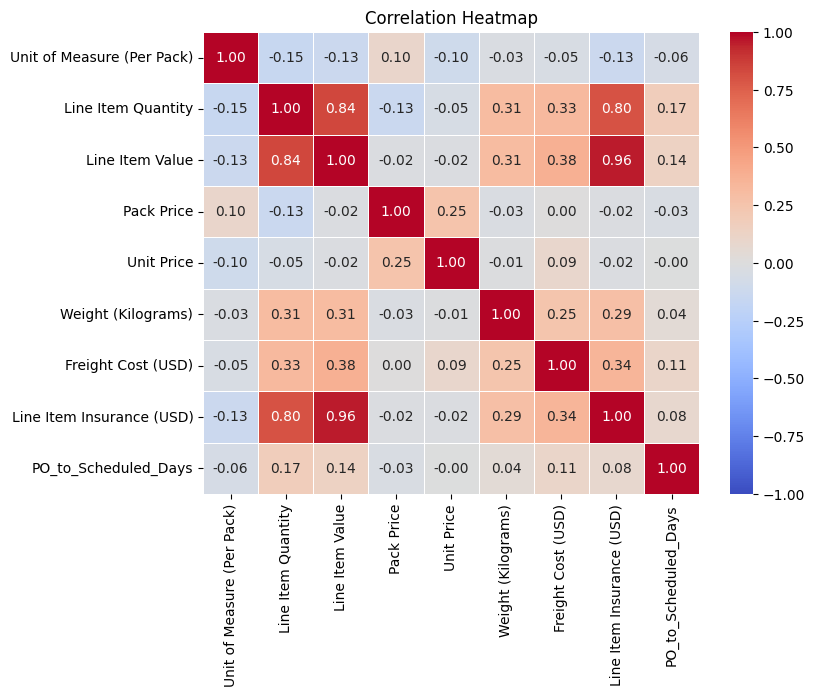

In [ ]:
# Correlation Heatmap visualization code
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,         # Display the correlation values
    fmt=".2f",          # Format values to 2 decimal places
    cmap="coolwarm",    # Color map
    vmin=-1, vmax=1,    # Correlation range
    linewidths=0.5      # Line width between cells
)
plt.title('Correlation Heatmap')
plt.show()



##### 1. Why did you pick the specific chart?

**Visual Representation of Relationships:** A heatmap provides a clear, color-coded matrix to visualize the strength and direction of correlations between multiple variables at a glance.

**Ease of Interpretation:**

Positive correlations (close to 1) appear in warm colors (red), indicating strong direct relationships.
Negative correlations (close to -1) appear in cool colors (blue), showing strong inverse relationships.
Values near 0 appear neutral, signifying weak or no correlation.

**Handle Large Datasets:** When there are many numeric variables, a heatmap organizes the data compactly, showing all pairwise correlations in one visual.



##### 2. What is/are the insight(s) found from the chart?

**High Correlation Between Line Item Insurance and Line Item Value (0.96):**

**Interpretation:** Insurance cost increases almost proportionally with the value of the line item. This makes sense because higher-value shipments are likely insured for larger amounts.

**Business Insight:** This indicates that insurance costs are effectively tied to the shipment's value, reflecting standard insurance practices.

**Strong Correlation Between Line Item Value and Line Item Quantity (0.84):**

**Interpretation:** The higher the quantity of items, the greater their total value. This suggests that the unit price is fairly consistent across items in most shipments.

**Business Insight:** This trend could be used to predict the total value based on quantity, which may simplify forecasting or pricing strategies.

#### Chart - 15 - Pair Plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

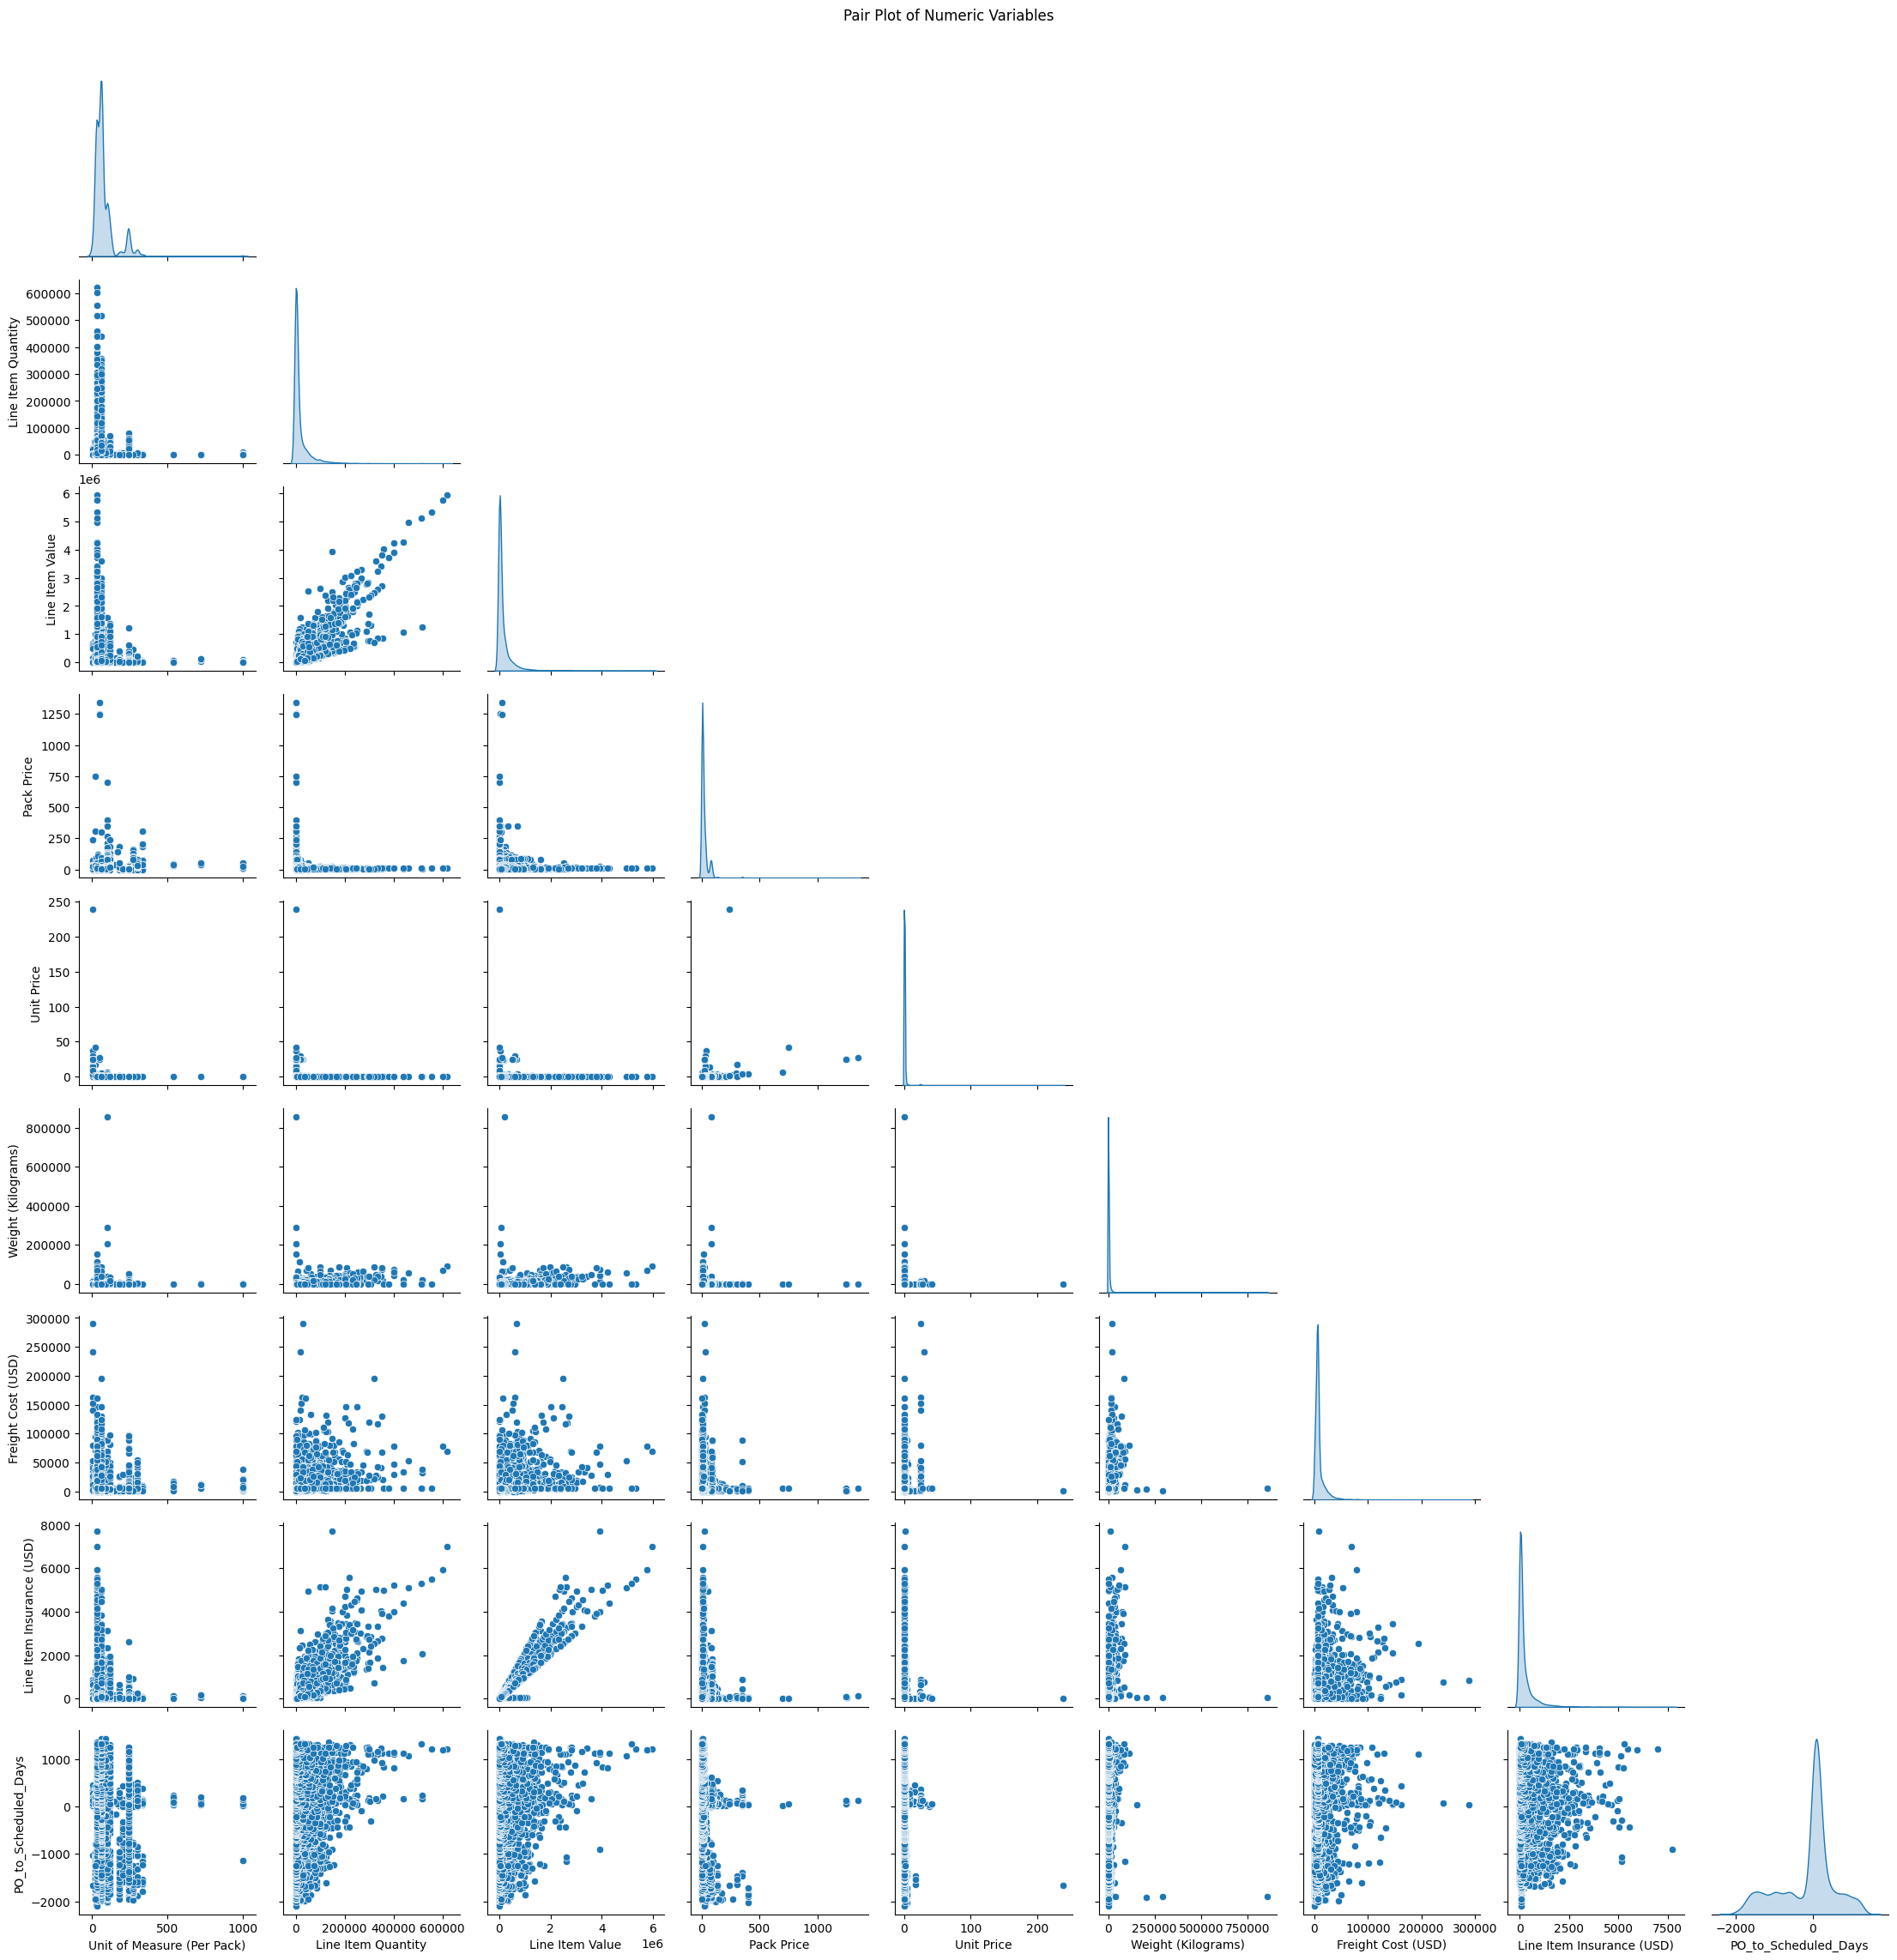

In [ ]:
# Pair Plot visualization code
# Select numeric columns from the dataset
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create the pair plot
sns.pairplot(df[numeric_columns], diag_kind="kde", corner=True, palette="coolwarm")
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

**The pair plot was chosen because it is a versatile and comprehensive visualization tool for exploring relationships and distributions among numerical variables in a dataset. Here's a breakdown of why it's particularly useful:**

**1.** **Holistic Exploration of Data:**
A pair plot provides a grid of scatter plots for each pair of numeric variables, offering a clear picture of their relationships in one visualization.
The diagonal shows distributions, giving insights into how individual variables are spread.

**2. Ease of Multivariate Analysis:**
It simultaneously examines relationships across multiple variables, saving time compared to creating separate scatter plots.
This makes it ideal for understanding interdependencies among variables like Line Item Insurance, Line Item Value, and Line Item Quantity.

**3. Detecting Patterns and Outliers:**
Pair plots can reveal trends (e.g., linear or non-linear relationships) or anomalies (e.g., points far from the main clusters), which are critical for data cleaning and model building.

**4. Identifying Correlations and Redundancies:**
Features with strong relationships, such as Line Item Value and Line Item Insurance, or redundancies (highly correlated variables), are immediately apparent, aiding in feature selection or engineering.

**5. Visual Simplicity:**
Despite showing multiple relationships, the grid-like layout is intuitive and easy to interpret for analysts and non-technical stakeholders alike.

##### 2. What is/are the insight(s) found from the chart?

**Freight Cost & Line Item Insurance:** This makes sense because as the value of the shipment (in terms of line item insurance) increases, the associated freight costs may also rise. Higher-value shipments often require more comprehensive or expensive insurance, and thus, the freight cost might correlate with the insurance cost.

**Line Item Insurance & Line Item Value:** Typically, higher-value items (with a larger line item value) will require more insurance coverage, leading to a high correlation. The correlation value of 0.96 between these two suggests that as one increases, so does the other.

**Line Item Value & Line Item Quantity:** If more units of an item are being shipped, the overall value of the shipment increases, which is why this pair has a high correlation. A larger quantity usually corresponds to a higher value for the line item.
Positive Correlations:

**The positive correlation between Freight Cost, Line Item Insurance, Line Item Value, and Line Item Quantity is expected and logical. This means that for higher-value shipments, both insurance costs and freight charges are likely to increase proportionally.**

**These relationships suggest that when analyzing shipping and insurance costs, these variables should be considered together to understand cost structures.**


**Lack of Observable Patterns Elsewhere:**

The rest of the variables not showing any observable patterns or weak correlations imply that they may not have direct linear relationships with the ones listed above. This could suggest that other factors (e.g., shipment mode, country, vendor) could be influencing these variables in ways not captured purely by linear correlations.

In [ ]:
# Save the DataFrame to an Excel file to be used later on for creating Power BI dahboard
df.to_excel('fedex_logistics_modified.xlsx', index=False)

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Based on the analysis of the entire dataset, I recommend the following strategies to the client to achieve their business objectives effectively. These strategies are driven by insights gained from various visualizations and statistical analyses, including correlations, delivery performance, shipment modes, freight costs, and others.**

**1.** **Optimize Shipping Methods to Balance Cost and Delivery Speed**
**Objective:** **Reduce logistics costs while maintaining or improving delivery performance.**

**Action:** **Evaluate Shipment Modes:** The analysis suggests that air freight is disproportionately expensive and often has more outliers in terms of cost. Although air freight is crucial for urgent deliveries, it may be beneficial to explore cheaper shipping options (e.g., sea or road transport) for non-urgent deliveries.

**Impact:** By shifting non-urgent shipments from air freight to more cost-effective modes, the company can significantly reduce logistics costs without negatively impacting customer satisfaction for non-time-sensitive orders.

**Recommendation:** Implement a cost-benefit analysis for each shipment mode based on urgency, weight, and delivery destination. Introduce thresholds for air freight usage and prioritize alternatives where possible.

**2.** **Refine Inventory and Shipment Planning**

**Objective:** Improve operational efficiency and reduce costs while maintaining service quality.

**Action:** The time between PO sent to Vendor Date and Scheduled Delivery Date showed some influence on delivery performance. Understanding the relationship between these dates can help plan shipments more effectively.

**Impact:** By optimizing the timing of when purchase orders are placed and scheduled, the company can better manage inventory levels, reduce delays, and prevent rushed shipments that often lead to higher freight costs (especially air freight).

**Recommendation:** Use predictive analytics to forecast when orders should be placed to ensure timely delivery without resorting to high-cost shipping methods. Also, consider establishing clear vendor and shipment schedules to avoid delays caused by rushed orders.

**3.** **Leverage Data-Driven Vendor Management**

**Objective:** Improve vendor performance and reduce delays.

**Action:** Based on the analysis, there is a significant relationship between country and on-time delivery performance. Certain countries or vendors may have recurring issues with delivery timeliness.

**Impact:** Identifying these countries or vendors allows the business to work on improving the relationship with those vendors, renegotiate delivery terms, or even consider alternative vendors.

**Recommendation:** Implement a vendor performance monitoring system based on delivery timeliness and quality. For countries or vendors with consistently poor delivery performance, consider renegotiating terms, seeking alternative suppliers, or investing in logistics improvements.

**4.** **Enhance Forecasting and Decision-Making with Data**

**Objective:** Improve the forecasting of shipment demand and make smarter decisions on logistics.

**Action:** Based on the correlation between line item value, line item quantity, and freight costs, high-value items and larger shipments tend to have higher costs associated with them.

**Impact:** Understanding the relationship between item value, quantity, and freight costs will help the company forecast and budget better for logistics costs, especially for larger or more valuable shipments.

**Recommendation:** Implement advanced forecasting models to predict logistics costs based on the type of products being shipped. This can help set up dynamic pricing strategies for customers and optimize cost allocation.

**5.** **Addressing Outliers in Freight Costs**

**Objective:** Identify and mitigate unnecessary high freight costs.

**Action:** The boxplot analysis of freight costs reveals a large number of outliers, particularly in air shipments. These outliers could represent overcharged or poorly planned shipments.

**Impact:** Identifying these outliers can help negotiate better rates with carriers or revise shipping practices that lead to these excess costs.

**Recommendation:** Introduce a freight audit process that regularly reviews shipments with unusually high costs. By identifying the root cause of these high costs (e.g., inefficient routes, emergency shipping), the company can renegotiate contracts or adjust internal processes to reduce such occurrences.

**6.** **Improve Customer Satisfaction with On-Time Deliveries**

**Objective:** Increase the frequency of on-time deliveries to enhance customer satisfaction.

**Action:** The Chi-Square test confirmed that there is a statistically significant relationship between shipment mode and delivery performance (on-time vs. delayed). Addressing underperforming shipment modes or regions could improve on-time delivery rates.

**Impact:** A consistent on-time delivery record will not only enhance customer satisfaction but also improve the company’s reputation and lead to higher customer retention.

**Recommendation:** Work closely with logistics teams to improve delivery times, especially in regions with frequent delays. Set performance metrics for on-time deliveries and track shipments in real-time to ensure proactive problem-solving when delays occur.


# **Conclusion**

**In conclusion, the comprehensive analysis of the dataset has provided valuable insights into various aspects of the company's logistics operations, including shipment modes, freight costs, delivery performance, and vendor management. The key findings highlight significant correlations between freight costs, shipment modes, and on-time delivery performance, pointing to areas where operational improvements can be made.**

**To achieve the business objective of cost optimization and improved delivery performance, it is crucial to focus on strategic areas such as optimizing shipment modes, refining vendor management practices, and leveraging data-driven forecasting and decision-making tools. By reducing reliance on costly air freight, improving the timing of purchase orders, addressing outliers in freight costs, and enhancing vendor performance, the company can enhance both its bottom line and customer satisfaction.**

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***

In [ ]:
# Save the DataFrame to an Excel file so as to create Power BI Dashboard later on...
df.to_excel('fedex_logistics_modified2.xlsx', index=False)